In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# here I import the dataset. I converted it into a csv file using excel for the ease of problem exploration.
df = pd.read_csv('Parkinsons.csv')
df.head(4)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1


In [50]:
# drop 'names' column
df1 = df.drop(columns = ['name'])
df1.head(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1


In [51]:
# Here I scale the values for my data exploration
scaler = StandardScaler()
rows, cols = df1.shape
X = df1.iloc[:,:cols-1]
y = df1.iloc[:,cols-1]
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
print(X.head(3))

         0         1         2         3         4         5         6   \
0 -0.829300 -0.436165 -0.952037  0.334914  0.749759  0.132963  0.760800   
1 -0.770972 -0.530974 -0.057721  0.715418  1.037674  0.453892  1.276809   
2 -0.909476 -0.723168 -0.109875  0.884991  1.325589  0.720770  1.585687   

         7         8         9   ...        12        13        14        15  \
0  0.131755  0.745985  0.739536  ...  0.332985  0.607532 -0.067893 -0.193225   
1  0.452684  1.681731  1.768464  ...  1.159454  1.548254 -0.137843 -0.634508   
2  0.721813  1.202693  1.027636  ...  0.699187  1.175323 -0.291633 -0.279760   

         16        17        18        19        20        21  
0 -0.807838  1.760814  0.801323  0.480477 -0.210531  0.868886  
1 -0.387524  1.837562  1.479853  1.311185  0.275077  1.803605  
2 -0.662075  1.942048  1.141445  1.017682 -0.103629  1.402661  

[3 rows x 22 columns]


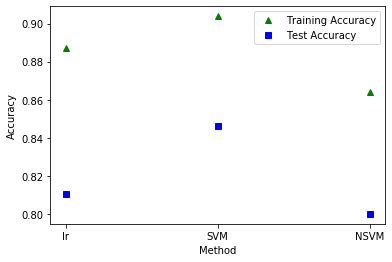

[0.8871794871794872, 0.903846153846154, 0.864102564102564]
[0.8102564102564103, 0.8461538461538461, 0.8]


In [52]:
def models_scaled(X_train_mat,y_train_vec,network):
    if network == 'lr':
        clf = LogisticRegression(penalty = 'l2')
    elif network == 'SVM':
        clf = SVC()
    elif network == 'NSVM':
        clf = SVC(kernel = 'poly', degree=8)
    scores = cross_validate(
        clf,
        X_train_mat,
        y_train_vec,
        scoring=['accuracy'],
        cv=5,
        return_train_score='True')
    train_accuracy = scores['train_accuracy'].mean()
    test_accuracy = scores['test_accuracy'].mean()
    return train_accuracy, test_accuracy

networks = ['lr', 'SVM', 'NSVM']



train_accuracy = []
test_accuracy = []

for network in networks:
    new_train_accuracy,new_test_accuracy = models_scaled(X,y,network)
    train_accuracy.append(new_train_accuracy)
    test_accuracy.append(new_test_accuracy)
    
x = np.array([0, 1, 2])
y = np.array(train_accuracy)
y2 = np.array(test_accuracy)
plt.plot(x, y, 'g^', label='Training Accuracy')
plt.plot(x, y2, 'bs', label='Test Accuracy')
my_xticks = ['lr', 'SVM', 'NSVM']
plt.xticks(x, my_xticks)
plt.ylabel('Accuracy')
plt.xlabel('Method')
plt.legend(loc = 'upper right')
plt.show()

print(train_accuracy)
print(test_accuracy)

## Analysis using Feature Engineering

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
import operator


df2 = pd.read_csv('Parkinsons.csv')
df2.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [150]:
df = df2.drop(columns = ['name'])
df.head(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1


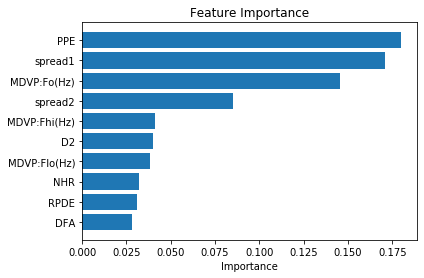

In [151]:
label_name = df.columns[-1]   # not considering the label for my feature importance analysis.

rf = RandomForestClassifier(
        n_estimators=50,
        max_depth=8,
        min_samples_leaf=4,
        max_features=0.5)
rf.fit(df.drop([label_name], axis=1), df[label_name])
old_features = list(df.drop([label_name], axis=1))
feature_importances = {}
feature_importances_list = rf.feature_importances_
for index, feature in enumerate(old_features):
    
    feature_importances[feature] = feature_importances_list[index]
itemlist = sorted(feature_importances.items(), key=operator.itemgetter(1), reverse=True)

#Here I plot the 10 most important features.
fig, ax = plt.subplots()
feature_names = [x[0] for x in itemlist[:10]]
feature_importance = [x[1] for x in itemlist[:10]]
ax.barh(feature_names, feature_importance, align='center')
ax.set_yticklabels(feature_names)
ax.invert_yaxis()
ax.set_xlabel('Importance')
ax.set_title('Feature Importance')
plt.show()

In [152]:
# keeping the top 7 most important feature and dropping the rest

df = df.drop(columns = ['HNR','NHR','DFA','RPDE','Shimmer:APQ5','Jitter:DDP','Shimmer:APQ3','Shimmer:DDA','MDVP:Jitter(%)','MDVP:Shimmer(dB)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','MDVP:Shimmer','MDVP:APQ'],axis=1)
df.head(3)                        

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,-4.443179,0.311173,2.342259,0.332634,1


In [153]:
# Here I scale the values for my data exploration

scaler = StandardScaler()
rows, cols = df.shape
X = df.iloc[:,:cols-1]
y = df.iloc[:,cols-1]
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
print(X.head(3))

          0         1         2         3         4         5         6
0 -0.829300 -0.436165 -0.952037  0.801323  0.480477 -0.210531  0.868886
1 -0.770972 -0.530974 -0.057721  1.479853  1.311185  0.275077  1.803605
2 -0.909476 -0.723168 -0.109875  1.141445  1.017682 -0.103629  1.402661


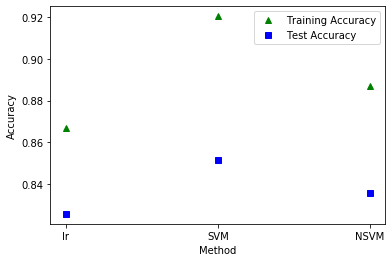

[0.8666666666666668, 0.9205128205128206, 0.8871794871794872]
[0.8256410256410257, 0.8512820512820513, 0.8358974358974359]


In [154]:
def models_featured(X_train_mat,y_train_vec,network):
    if network == 'lr':
        clf = LogisticRegression(penalty = 'l2')
    elif network == 'SVM':
        clf = SVC()
    elif network == 'NSVM':
        clf = SVC(kernel = 'poly', degree=7)
    scores = cross_validate(
        clf,
        X_train_mat,
        y_train_vec,
        scoring=['accuracy'],
        cv=5,
        return_train_score='True')
    train_accuracy = scores['train_accuracy'].mean()
    test_accuracy = scores['test_accuracy'].mean()
    return train_accuracy, test_accuracy

networks = ['lr', 'SVM', 'NSVM']



train_accuracy = []
test_accuracy = []

for network in networks:
    new_train_accuracy,new_test_accuracy = models_featured(X,y,network)
    train_accuracy.append(new_train_accuracy)
    test_accuracy.append(new_test_accuracy)
    
x = np.array([0, 1, 2])
y = np.array(train_accuracy)
y2 = np.array(test_accuracy)
plt.plot(x, y, 'g^', label='Training Accuracy')
plt.plot(x, y2, 'bs', label='Test Accuracy')
my_xticks = ['lr', 'SVM', 'NSVM']
plt.xticks(x, my_xticks)
plt.ylabel('Accuracy')
plt.xlabel('Method')
plt.legend(loc= 'upper right')
plt.show()

print(train_accuracy)
print(test_accuracy)

# Comparing Results

## I use L2 regualrization for Logistic Regression and Polynomial kernel for Non Linear SVM

**It is observed from the results that the following are the training and test accuracies for the 3 models before and after feature engineering:**

**Logistic Regression :**
* Before Feature Engineering : 88%(Training),81%(Test)
* After Feature Engineering :86%(Training),82%(Test)

**SVM :**
* Before Feature Engineering : 90%(Training),84%(Test)
* After Feature Engineering : 92%(Training),85%(Test)

**Non Linear SVM :**
* Before Feature Engineering : 86%(Training),80%(Test)
* After Feature Engineering : 88%(Training),83%(Test)

